In [1]:
from solver.solver import FORCE, Godunov, ADER_ENO, ADER_WENO, BoundaryCondition
from solver.eos import EquationOfState
from solver.vector import Vector
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "axes.labelsize": "x-large"
})
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 24
BIGGEST_SIZE = 30

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGEST_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

In [3]:
xMin: float = -1.0
xMax: float = 1.0
nCells: int = 50
order: int = 5
bcLeft: BoundaryCondition = BoundaryCondition.PERIODIC
bcRight: BoundaryCondition = BoundaryCondition.PERIODIC
tMax: float = 16
C: float = 0.9
gamma = 1.4
eos = EquationOfState(gamma)

In [4]:
v = 1
p = 1

In [5]:
def test_1(x: float):
    return Vector(0.25 + np.sin(np.pi * x) ** 4, v, p)

test_2 = lambda x: Vector(2 if np.abs(x) < 0.5 else 1, v, p)

In [6]:
# initialConditionFunction: Callable[[float], Vector] = lambda x: Vector(1.0, 0, 1.0) if x < 0.5 else Vector(0.125, 0, 0.1)
initialConditionFunction = test_1

In [7]:
finalConditionFunction = lambda x: initialConditionFunction(x - v * tMax % ((xMax - xMin) / v))

In [8]:
solver = ADER_WENO(xMin, xMax, nCells, order, C, tMax, initialConditionFunction, eos, bcLeft, bcRight)
# solver = Godunov(xMin, xMax, nCells, C, tMax, initialConditionFunction, eos, bcLeft, bcRight)

In [9]:
xArray, primitiveArray = solver.returnData()

In [10]:
xTrue = np.linspace(xMin, xMax, 500)

In [11]:
qExactInitial = np.array([initialConditionFunction(x) for x in xTrue])
qExactFinal = np.array([finalConditionFunction(x) for x in xTrue])

In [12]:
rhoArray = np.array([q[0] for q in primitiveArray])
rhoExactInitial = np.array([q[0] for q in qExactInitial])
rhoExactFinal = np.array([q[0] for q in qExactFinal])

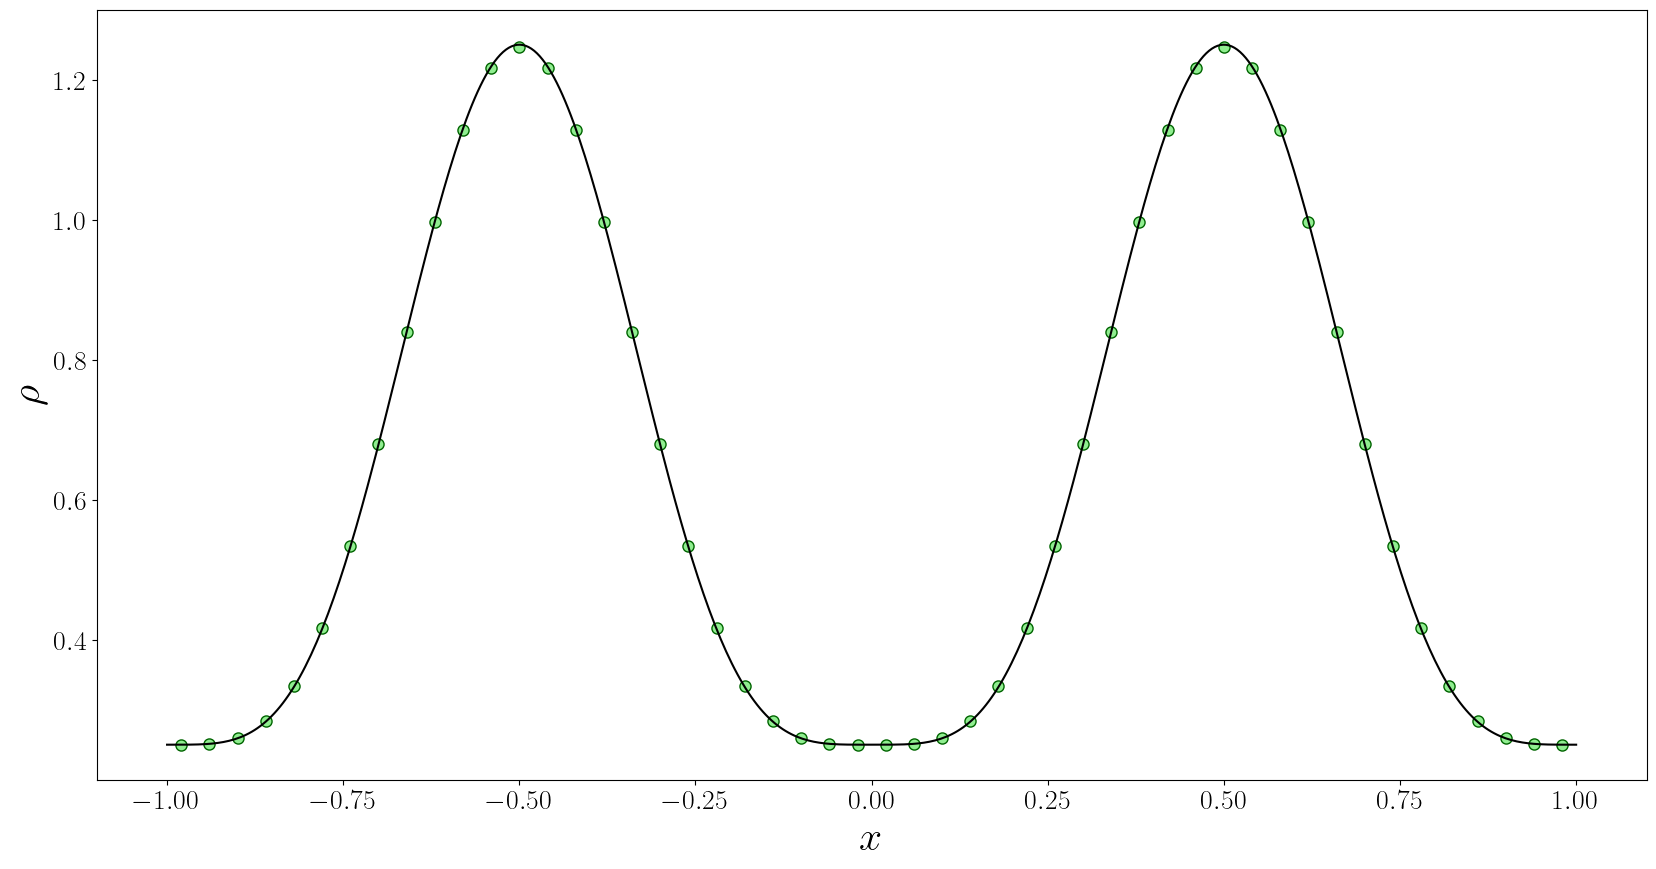

In [13]:
fig = plt.figure(figsize=(20, 10))
fig.tight_layout()
ax = fig.add_subplot(111)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\rho$")
ax.plot(xArray, rhoArray, linestyle='none', marker='o', markerfacecolor='lightgreen', markeredgecolor='darkgreen', markersize=8)
ax.plot(xTrue, rhoExactInitial, color='black')

In [14]:
start = time.time()
solver.solveODE()
end = time.time()

In [ ]:
print(f"duration = {end - start:.2f} seconds")

duration = 248.39 seconds


In [ ]:
xArray, primitiveFinal = solver.returnData()

In [ ]:
rhoFinal = np.array([q[0] for q in primitiveFinal])

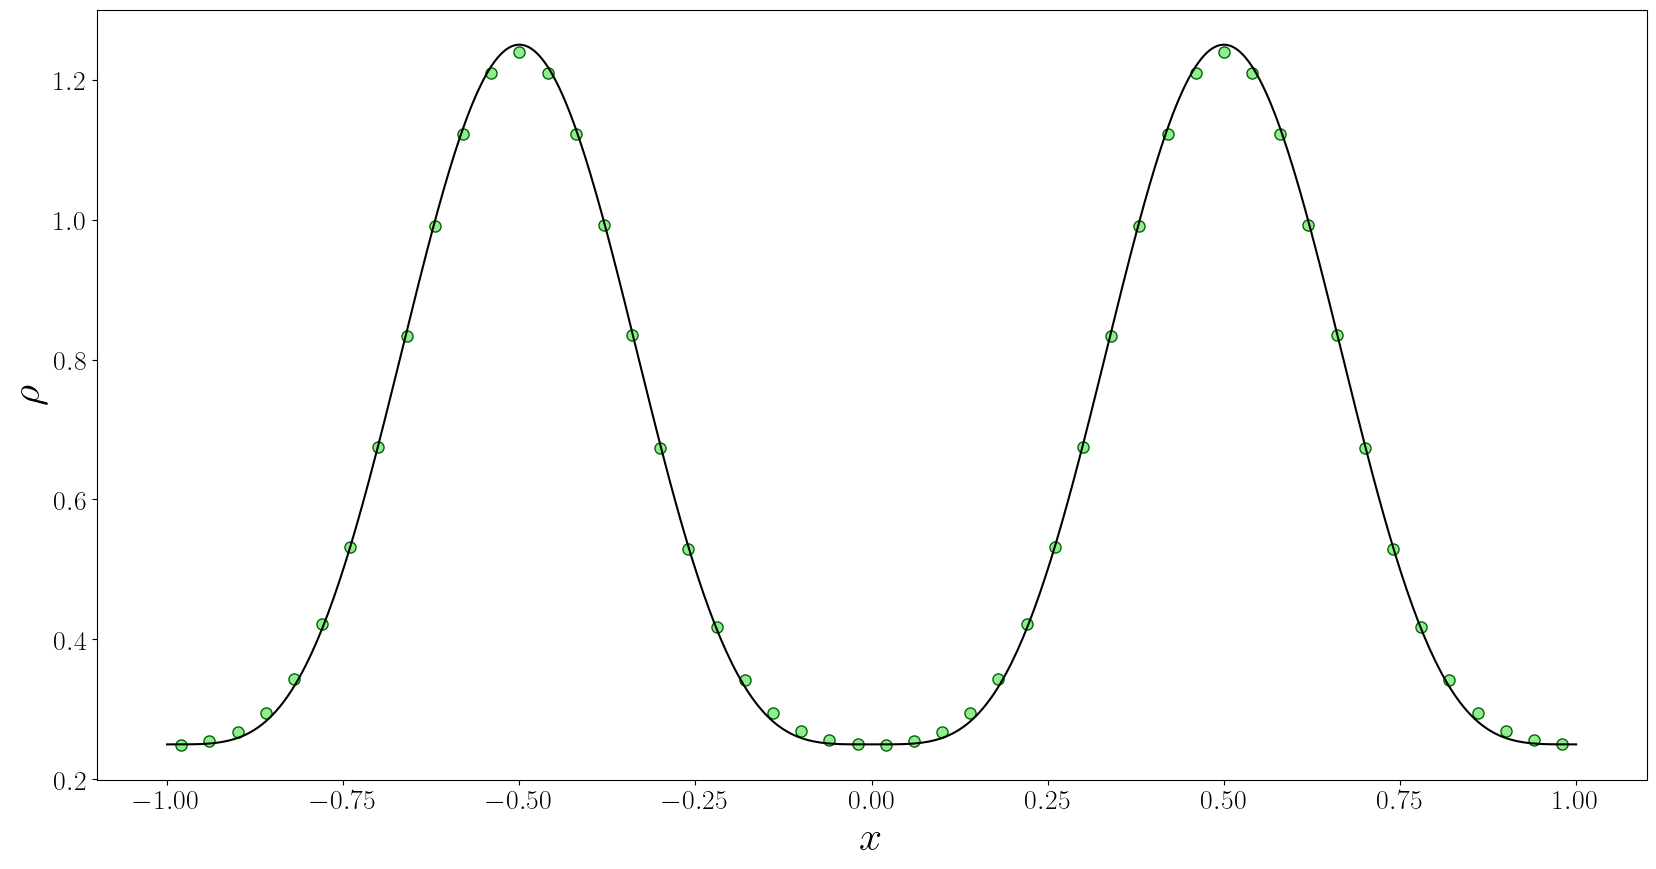

In [ ]:
fig = plt.figure(figsize=(20, 10))
fig.tight_layout()
ax = fig.add_subplot(111)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\rho$")
ax.plot(xArray, rhoFinal, linestyle='none', marker='o', markerfacecolor='lightgreen', markeredgecolor='darkgreen', markersize=8)
ax.plot(xTrue, rhoExactFinal, color='black')